In [165]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [255]:
class Ridge(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        self.lam_list=np.arange(0,5000,1)
#         self.lam_list=[0,0.1,0.3,0.5,1,2,3,4,5]     
    def train(self,lam):
        x,y=self.x,self.y
        p=x.shape[1]
        beta=np.linalg.inv(x.T@x+lam*np.eye(p))@x.T@y
        df=np.trace(x@np.linalg.inv(x.T@x+lam*np.eye(p))@x.T)
        return beta,df
    def cv_train(self):
        beta_list=[]
        df_list=[]
        for lam in self.lam_list:
            beta,df=self.train(lam)
            beta_list.append(beta)
            df_list.append(df)
        return beta_list,df_list       
    def predic(self):
        pass
#generate data
np.random.seed(1)
train_x=np.random.randn(300,5)
beta_true=np.array([-3,-2,0,3,4]).reshape(5,-1)
error=np.random.randn(300,1)
train_y=train_x@beta_true

ridge1=Ridge(train_x,train_y)
# beta,df=ridge1.train(3)
beta_list,df_list=ridge1.cv_train()
len(beta_list)

5000

In [256]:
b0=[i[0] for i in beta_list]
b1=[i[1] for i in beta_list]
b2=[i[2] for i in beta_list]
b3=[i[3] for i in beta_list]
b4=[i[4] for i in beta_list]

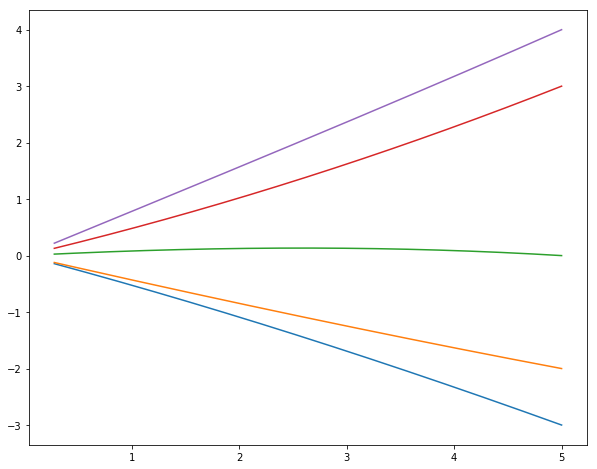

In [257]:
plt.figure(figsize = (10,8))
for i,beta in enumerate([b0,b1,b2,b3,b4]):
    plt.plot(df_list,beta,label='beta'+str(i))